In [1]:
##############################################
# EXPLORING PERFORMANCES OF GENERATED MODELS
# We run a bunch of games to evaluate 
# the win, draw and loss probabilities of
# generated models.
# We store the outcomes and the ground truth 
# in a database to evaluate it later
##############################################


# INITIALIZE ALL RELEVANT VARIBLES AND FUNCTIONS
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from bipedal_walker_wrapper import BipedalWalkerAgent

ID_DIFF = 10000 # The algorithm saves a new model each 10000 training steps
NUMBER_OF_GAMES = 50 # For each model we play 50 games
NUMBER_OF_LEVELS = 3 # We have 3 difficulty levels

agent = BipedalWalkerAgent()

def set_difficulty_level(level):
    if level == 0:
        # Easy level
        agent.set_environment_type(hardcore=False, super_easy=True)
    elif level == 1:
        # Medium level
        agent.set_environment_type(hardcore=False, super_easy=False)
    elif level == 2:
        # Hard level
        agent.set_environment_type(hardcore=True, super_easy=False)
    else:
        print('Unknown difficulty level')

def evaluate_batch(difficulty_level, difficulty_train, model_ids):
    # Evaluates the models specified in the model_ids list trained on difficulty_train level
    # against the difficulty level specifies
    n_wins = 0
    n_draws = 0
    n_loss = 0
    
    set_difficulty_level(difficulty_level)
    agent.set_model_difficulty(difficulty_train)
    average_rewards = []
    win_percentage = []
    draw_percentage = []
    loss_percentage = []
    
    # Iterate over each model in the batch
    for model in model_ids:
        # Load the model
        agent.load_model(model)
        total_model_reward = 0.0
        n_wins = 0
        n_draws = 0
        n_losses = 0

        # play NUMBER_OF_GAMES time to average the results
        for i in range(NUMBER_OF_GAMES):
            outcome, reward = agent.play()
            total_model_reward += reward

            if outcome == 1:
                n_wins += 1
            elif outcome == 0:
                n_draws += 1
            else:
                n_losses +=1
                
        average_rewards.append(total_model_reward / NUMBER_OF_GAMES)
        win_percentage.append(n_wins / NUMBER_OF_GAMES)
        draw_percentage.append(n_draws / NUMBER_OF_GAMES)
        loss_percentage.append(n_losses / NUMBER_OF_GAMES)
    
    outcomes = (win_percentage, draw_percentage, loss_percentage)
    return outcomes, average_rewards

def plot_(title, data, labels = [], lim = None, filename='file', save_plots=False):
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (15, 5) # (w, h)
    
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    a1 = ax.plot(data[0])
    a2 = ax.plot(data[1])
    a3 = ax.plot(data[2])

    plt.legend((a1[0], a2[0], a3[0]), ('Easy', 'Medium', 'Hard'))
    
    if len(labels) > 0:
        x = range(len(labels))
        plt.xticks(x, labels, rotation='vertical')
    
    if lim != None:
        plt.ylim(lim[0], lim[1])
    plt.show()
    
    if save_plots:
        path = 'img/ground_truth/' + filename + '.png'
        fig.savefig(path, bbox_inches='tight')

In [4]:
##################################################
# EXPLORE MODELS TRAINED ON THE EASY ENVIRONMENT
##################################################

model_difficulty = 'easy'

easy_ids_batch = np.linspace(160000, 300000, (30-16)+1, endpoint=True, dtype=int)#[250000,320000,330000]
%store easy_ids_batch

outcomes_model_easy = {}
rewards_model_easy = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('##########################\n# PLAYING AGAINST LEVEL {}\n##########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, easy_ids_batch)
    outcomes_model_easy[i] = outcomes
    rewards_model_easy.append(rewards)

    
%store rewards_model_easy
%store outcomes_model_easy
print('########### COMPUTATION COMPLETED ###########')


Stored 'easy_ids_batch' (ndarray)
#########################
# PLAYING AGAINS LEVEL 0
#########################
INFO:tensorflow:Restoring parameters from ./models/easy/model-160000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-170000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-180000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-190000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-200000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-210000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-220000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-230000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-240000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-250000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-260000.ckpt
INFO:tensorflow:Restoring parameters from ./models/easy/model-270000.ckpt
I

Stored 'win_perc_easy' (list)
Stored 'draw_perc_easy' (list)
Stored 'loss_perc_easy' (list)


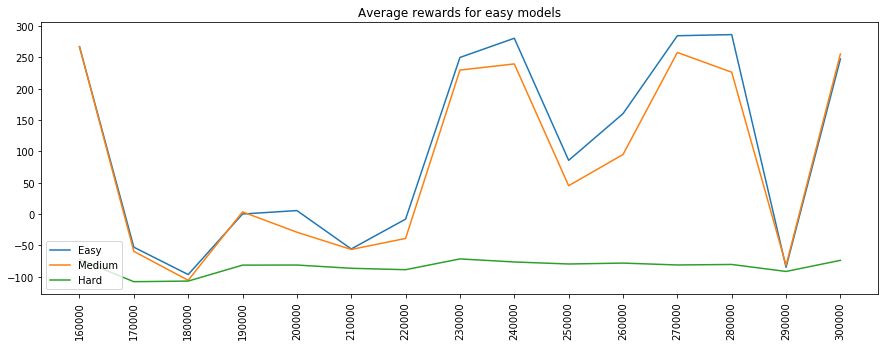

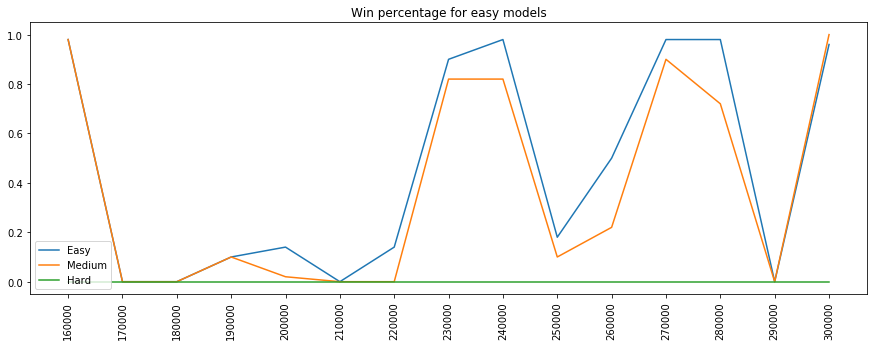

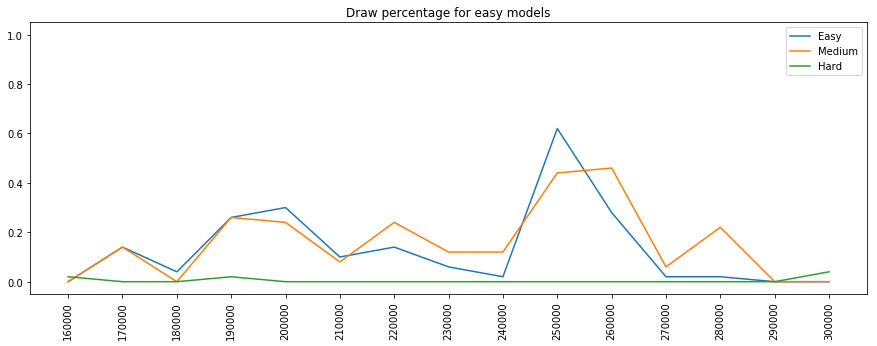

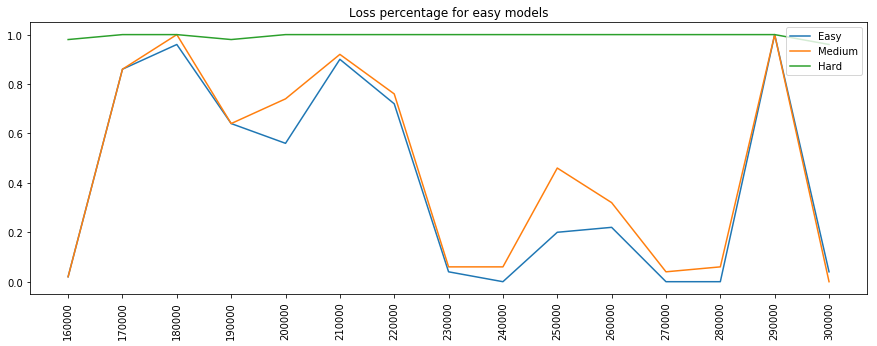

In [21]:
##############################
# PLOT THE RESULTS
##############################
save=False

%store -r easy_ids_batch
%store -r rewards_model_easy
%store -r outcomes_model_easy

win_perc_easy = []
draw_perc_easy = []
loss_perc_easy = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_easy.append(outcomes_model_easy[i][0])
    draw_perc_easy.append(outcomes_model_easy[i][1])
    loss_perc_easy.append(outcomes_model_easy[i][2])
    
%store win_perc_easy
%store draw_perc_easy
%store loss_perc_easy

# We expect these models to be able to solve only easy environments

plot_('Average rewards for easy models',rewards_model_easy, labels=easy_ids_batch, filename='easy/rewards', save_plots=save)
plot_('Win percentage for easy models', win_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/win', save_plots=save)
plot_('Draw percentage for easy models', draw_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/draw', save_plots=save)
plot_('Loss percentage for easy models', loss_perc_easy, labels=easy_ids_batch, lim=(-0.05,1.05), filename='easy/loss', save_plots=save)

In [2]:
################################################
# EVALUATE MODELS TRAINED IN MEDIUM ENVIRONMENT
################################################

model_difficulty = 'medium'

medium_ids_batch = np.linspace(150000, 300000, (30-15)+1, endpoint=True, dtype=int)#[220000, 250000, 260000, 270000, 280000]
%store medium_ids_batch

outcomes_model_medium = []
rewards_model_medium = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('##########################\n# PLAYING AGAINST LEVEL {}\n##########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, medium_ids_batch)
    outcomes_model_medium.append(outcomes)
    rewards_model_medium.append(rewards)

%store rewards_model_medium
%store outcomes_model_medium
print('########### COMPUTATION COMPLETED ###########')

Stored 'medium_ids_batch' (ndarray)
#########################
# PLAYING AGAINS LEVEL 0
#########################
INFO:tensorflow:Restoring parameters from ./models/medium/model-150000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-160000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-170000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-180000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-190000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-200000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-210000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-220000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-230000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-240000.ckpt
INFO:tensorflow:Restoring parameters from ./models/medium/model-250000.ckpt
INFO:tensorflow:Restoring parameters from ./models/

Stored 'win_perc_medium' (list)
Stored 'draw_perc_medium' (list)
Stored 'loss_perc_medium' (list)


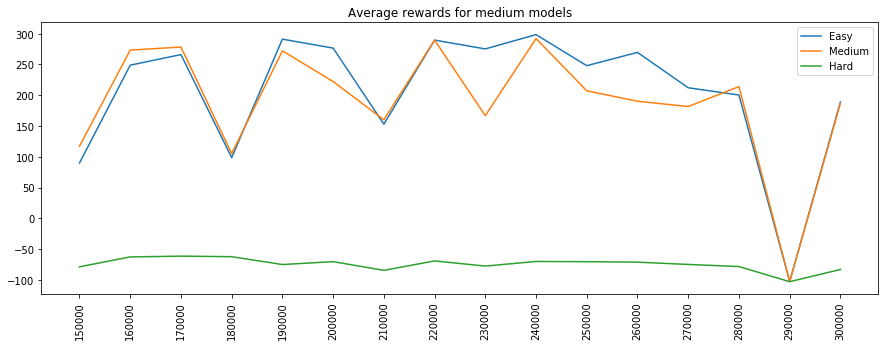

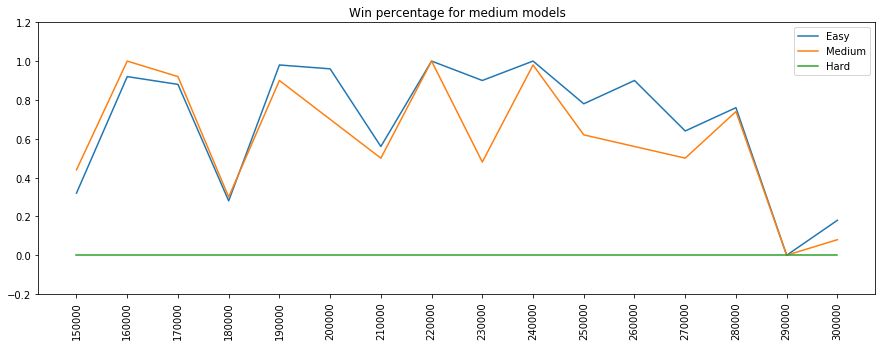

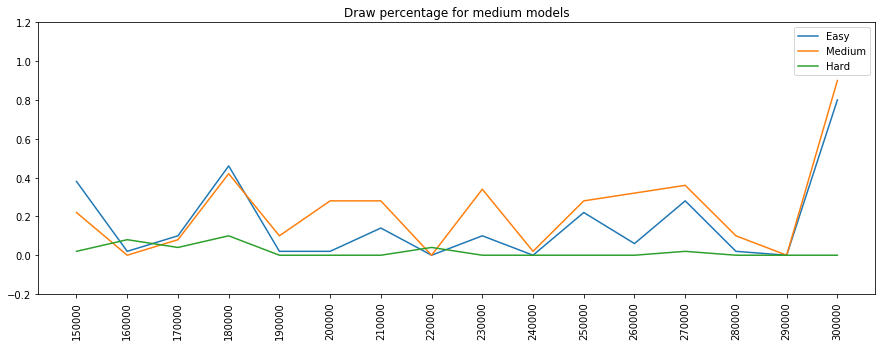

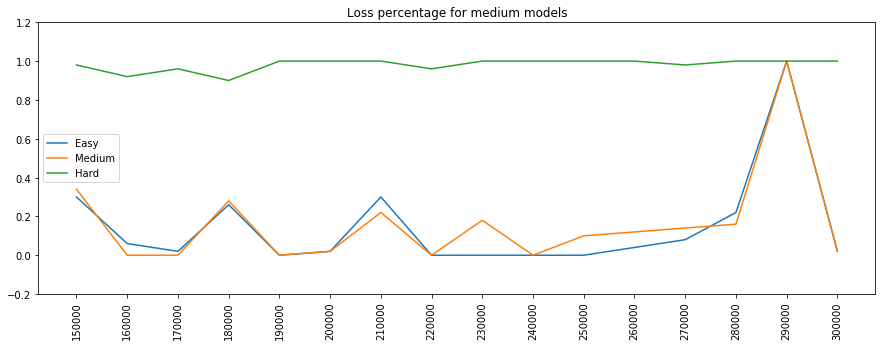

In [14]:
#####################
# PLOT THE RESULTS
#####################
save=True

%store -r medium_ids_batch
%store -r rewards_model_medium
%store -r outcomes_model_medium

win_perc_medium = []
draw_perc_medium = []
loss_perc_medium = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_medium.append(outcomes_model_medium[i][0])
    draw_perc_medium.append(outcomes_model_medium[i][1])
    loss_perc_medium.append(outcomes_model_medium[i][2])
    
%store win_perc_medium
%store draw_perc_medium
%store loss_perc_medium


# We expect these models to be able to solve easy and medium environments

plot_('Average rewards for medium models',rewards_model_medium, labels=medium_ids_batch, filename='medium/rewards', save_plots=save)
plot_('Win percentage for medium models', win_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/win', save_plots=save)
plot_('Draw percentage for medium models', draw_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/draw', save_plots=save)
plot_('Loss percentage for medium models', loss_perc_medium, labels=medium_ids_batch, lim=(-0.2,1.2), filename='medium/loss', save_plots=save)

In [4]:
################################################
# EVALUATE MODELS TRAINED IN HARD ENVIRONMENT
################################################
model_difficulty = 'hard'

hard_ids_batch = [1070000, 1080000, 1100000, 1110000, 1120000, 1180000, 1220000, 1290000, 1300000, 1310000, 1330000, 1340000, 1500000, 1550000, 1570000]#[1030000,1340000,1500000,1510000,1550000]
%store hard_ids_batch

outcomes_model_hard = []
rewards_model_hard = []

# For each difficulty level
for i in range(NUMBER_OF_LEVELS):
    print('##########################\n# PLAYING AGAINST LEVEL {}\n##########################'.format(i))
    outcomes, rewards = evaluate_batch(i, model_difficulty, hard_ids_batch)
    outcomes_model_hard.append(outcomes)
    rewards_model_hard.append(rewards)

%store rewards_model_hard
%store outcomes_model_hard
print('########### COMPUTATION COMPLETED ###########')

Stored 'hard_ids_batch' (list)
##########################
# PLAYING AGAINST LEVEL 0
##########################
INFO:tensorflow:Restoring parameters from ./models/hard/model-1070000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1080000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1100000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1110000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1120000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1180000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1220000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1290000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1300000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1310000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-1330000.ckpt
INFO:tensorflow:Restoring parameters from ./models/hard/model-13

Stored 'win_perc_hard' (list)
Stored 'draw_perc_hard' (list)
Stored 'loss_perc_hard' (list)


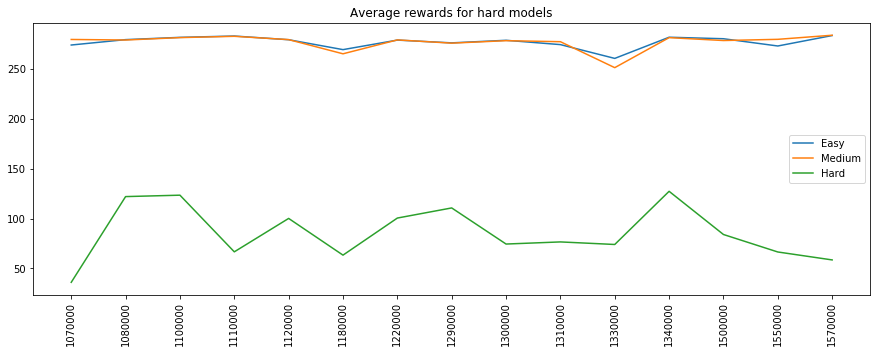

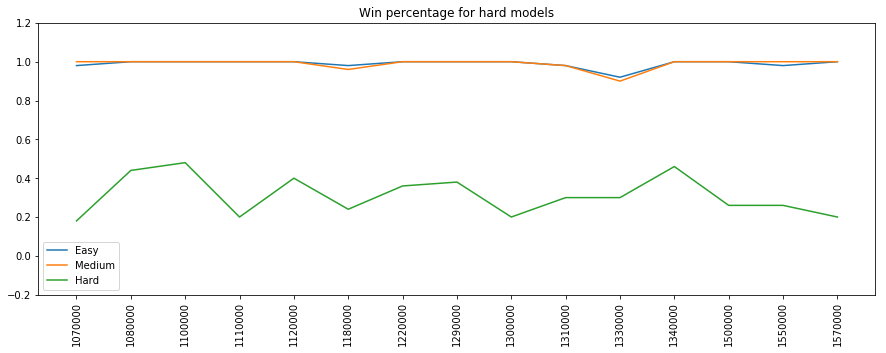

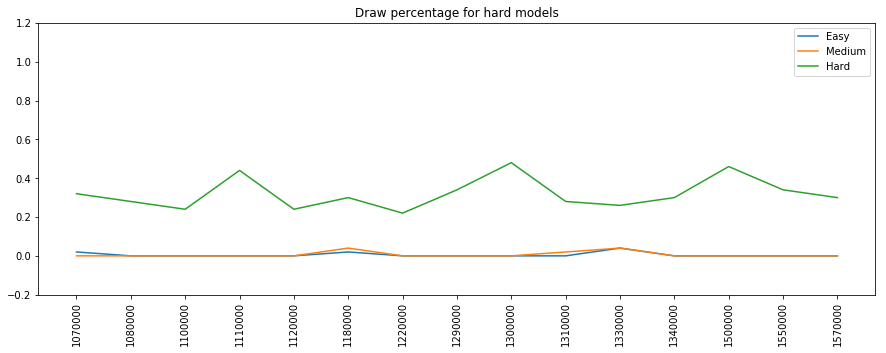

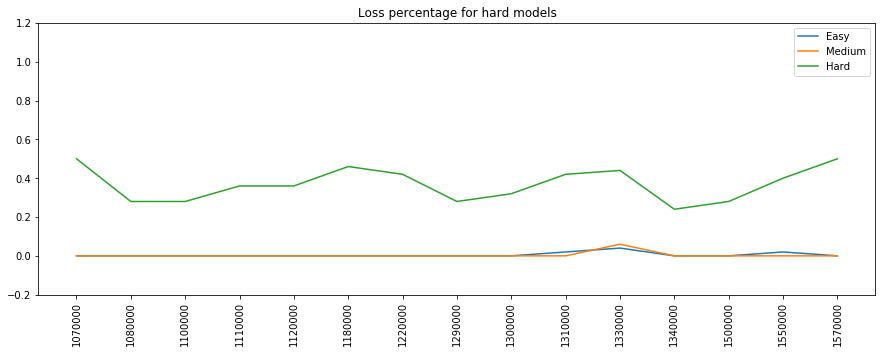

In [15]:
#####################
# PLOT THE RESULTS
#####################
save = True

%store -r hard_ids_batch
%store -r rewards_model_hard
%store -r outcomes_model_hard

win_perc_hard = []
draw_perc_hard = []
loss_perc_hard = []


for i in range(NUMBER_OF_LEVELS):
    win_perc_hard.append(outcomes_model_hard[i][0])
    draw_perc_hard.append(outcomes_model_hard[i][1])
    loss_perc_hard.append(outcomes_model_hard[i][2])
    
%store win_perc_hard
%store draw_perc_hard
%store loss_perc_hard


# We expect these models to be able to solve easy and medium environments

plot_('Average rewards for hard models',rewards_model_hard, labels=hard_ids_batch, filename='hard/rewards', save_plots=save)
plot_('Win percentage for hard models', win_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/win', save_plots=save)
plot_('Draw percentage for hard models', draw_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/draw', save_plots=save)
plot_('Loss percentage for hard models', loss_perc_hard, labels=hard_ids_batch, lim=(-0.2,1.2), filename='hard/loss', save_plots=save)

In [10]:
#############################
# SAVE GROUND TRUTH IN A DB
#############################

%store -r easy_ids_batch
%store -r medium_ids_batch
%store -r hard_ids_batch

%store -r outcomes_model_easy
%store -r outcomes_model_medium
%store -r outcomes_model_hard

%store -r win_perc_easy
%store -r win_perc_medium
%store -r win_perc_hard

%store -r draw_perc_easy
%store -r draw_perc_medium
%store -r draw_perc_hard

%store -r loss_perc_easy
%store -r loss_perc_medium
%store -r loss_perc_hard

def store_exploration(difficulty_train, model_id, difficulty_play, outcomes):
    conn = sqlite3.connect('./data/validation.db')
    cur = conn.cursor()
    
    values = (difficulty_train, int(model_id), difficulty_play, outcomes[0][difficulty_play], outcomes[1][difficulty_play], outcomes[2][difficulty_play])
    cur.execute('INSERT INTO exploration(difficulty_train, model_id, difficulty_play, win_prob, draw_prob, loss_prob) VALUES(?,?,?,?,?,?)', values)
    conn.commit()
    conn.close()

def sex_batch(model_ids, draw_perc):
    shape = (len(model_ids), NUMBER_OF_LEVELS)
    out = np.zeros(shape, dtype=float)
    
    for i in range(len(model_ids)):
        for j in range(NUMBER_OF_LEVELS):
            out[i][j] = draw_perc[j][i]
    return out

def sex_update_db(difficulty_train, model_ids, draws_p, cur):
    for i in range(len(model_ids)):
        truth = int(np.argmax(draws_p[i]))
        values = (difficulty_train, int(model_ids[i]), truth,)
        cur.execute('INSERT INTO models(difficulty_train, model_id, truth) VALUES(?,?,?)', values)

    
    

conn = sqlite3.connect('./data/validation.db')
cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS models (
    id integer PRIMARY KEY,
    difficulty_train text NOT NULL,
    model_id integer NOT NULL,
    truth integer
)''')

cur.execute('''CREATE TABLE IF NOT EXISTS exploration (
    id integer PRIMARY KEY,
    difficulty_train text NOT NULL,
    model_id integer NOT NULL,
    difficulty_play,
    average_reward real,
    win_prob real,
    draw_prob real,
    loss_prob real
)''')


draws = sex_batch(easy_ids_batch, draw_perc_easy)
sex_update_db('easy', easy_ids_batch, draws, cur)

draws = sex_batch(medium_ids_batch, draw_perc_medium)
sex_update_db('medium', medium_ids_batch, draws, cur)

draws = sex_batch(hard_ids_batch, draw_perc_hard)
sex_update_db('hard', hard_ids_batch, draws, cur)

cur.execute('SELECT * FROM models')
for row in cur.fetchall():
    print(row)
conn.commit()
conn.close()    

(1, 'easy', 250000, 0)
(2, 'easy', 320000, 1)
(3, 'easy', 330000, 1)
(4, 'medium', 220000, 2)
(5, 'medium', 250000, 1)
(6, 'medium', 260000, 1)
(7, 'medium', 270000, 1)
(8, 'medium', 280000, 1)
(9, 'hard', 1030000, 2)
(10, 'hard', 1340000, 2)
(11, 'hard', 1500000, 2)
(12, 'hard', 1510000, 2)
(13, 'hard', 1550000, 2)
(14, 'easy', 160000, 2)
(15, 'easy', 170000, 0)
(16, 'easy', 180000, 0)
(17, 'easy', 190000, 0)
(18, 'easy', 200000, 0)
(19, 'easy', 210000, 0)
(20, 'easy', 220000, 1)
(21, 'easy', 230000, 1)
(22, 'easy', 240000, 1)
(23, 'easy', 250000, 0)
(24, 'easy', 260000, 1)
(25, 'easy', 270000, 1)
(26, 'easy', 280000, 1)
(27, 'easy', 290000, 0)
(28, 'easy', 300000, 2)
(29, 'medium', 150000, 0)
(30, 'medium', 160000, 2)
(31, 'medium', 170000, 0)
(32, 'medium', 180000, 0)
(33, 'medium', 190000, 1)
(34, 'medium', 200000, 1)
(35, 'medium', 210000, 1)
(36, 'medium', 220000, 2)
(37, 'medium', 230000, 1)
(38, 'medium', 240000, 1)
(39, 'medium', 250000, 1)
(40, 'medium', 260000, 1)
(41, 'medi

[160000 170000 180000 190000 200000 210000 220000 230000 240000 250000
 260000 270000 280000 290000 300000]


In [11]:
#############################
# SAVE GROUND TRUTH IN A DB
#############################

%store -r easy_ids_batch
%store -r medium_ids_batch
%store -r hard_ids_batch

%store -r outcomes_model_easy
%store -r outcomes_model_medium
%store -r outcomes_model_hard

%store -r draw_perc_easy
%store -r draw_perc_medium
%store -r draw_perc_hard

%store -r rewards_model_easy
%store -r rewards_model_medium
%store -r rewards_model_hard

def store_probs(difficult_train, model_id, difficult_play, reward, probs, cursor):
    values = (difficult_train, int(model_id), difficult_play, reward, probs[0], probs[1], probs[2],)
    cursor.execute('INSERT INTO probabilities(difficulty_train, model_id, difficulty_play, average_reward, win_prob, draw_prob, loss_prob) VALUES(?,?,?,?,?,?,?)', values)

def unfold_batch(model_ids, draw_perc):
    shape = (len(model_ids), NUMBER_OF_LEVELS)
    out = np.zeros(shape, dtype=float)
    
    for i in range(len(model_ids)):
        for j in range(NUMBER_OF_LEVELS):
            out[i][j] = draw_perc[j][i]
    return out

def update_truth_db(difficulty_train, model_ids, draws_p, cur):
    for i in range(len(model_ids)):
        truth = int(np.argmax(draws_p[i]))
        values = (difficulty_train, int(model_ids[i]), truth,)
        cur.execute('INSERT INTO truth(difficulty_train, model_id, truth) VALUES(?,?,?)', values)

def fill_prob_table(difficult_train, ids, outcomes, rewards, cur):
    for i in range(len(ids)):
        model_id = int(ids[i])
        for j in range(NUMBER_OF_LEVELS):
            probs = []
            reward = rewards[j][i]
            for k in range(3):
                probs.append(outcomes[j][k][i])
            store_probs(difficult_train, model_id, j, reward, probs, cur)    
    

conn = sqlite3.connect('./data/exploration.db')
cur = conn.cursor()

cur.execute('''CREATE TABLE IF NOT EXISTS truth (
    id integer PRIMARY KEY,
    difficulty_train text NOT NULL,
    model_id integer NOT NULL,
    truth integer
)''')

cur.execute('''CREATE TABLE IF NOT EXISTS probabilities (
    id integer PRIMARY KEY,
    difficulty_train text NOT NULL,
    model_id integer NOT NULL,
    difficulty_play,
    average_reward real,
    win_prob real,
    draw_prob real,
    loss_prob real
)''')



fill_prob_table('easy', easy_ids_batch, outcomes_model_easy, rewards_model_easy, cur)
draws = unfold_batch(easy_ids_batch, draw_perc_easy)
update_truth_db('easy', easy_ids_batch, draws, cur)

fill_prob_table('medium', medium_ids_batch, outcomes_model_medium, rewards_model_medium, cur)
draws = unfold_batch(medium_ids_batch, draw_perc_medium)
update_truth_db('medium', medium_ids_batch, draws, cur)

fill_prob_table('hard', hard_ids_batch, outcomes_model_hard, rewards_model_hard, cur)
draws = unfold_batch(hard_ids_batch, draw_perc_hard)
update_truth_db('hard', hard_ids_batch, draws, cur)

conn.commit()
conn.close() 

In [13]:
conn = sqlite3.connect('./data/exploration.db')
cur = conn.cursor()

#cur.execute('SELECT * FROM probabilities')
#for row in cur.fetchall():
#    print(row)
    
cur.execute('SELECT * FROM truth')
for row in cur.fetchall():
    print(row)
    
conn.close()

(1, 'easy', 160000, 2)
(2, 'easy', 170000, 0)
(3, 'easy', 180000, 0)
(4, 'easy', 190000, 0)
(5, 'easy', 200000, 0)
(6, 'easy', 210000, 0)
(7, 'easy', 220000, 1)
(8, 'easy', 230000, 1)
(9, 'easy', 240000, 1)
(10, 'easy', 250000, 0)
(11, 'easy', 260000, 1)
(12, 'easy', 270000, 1)
(13, 'easy', 280000, 1)
(14, 'easy', 290000, 0)
(15, 'easy', 300000, 2)
(16, 'medium', 150000, 0)
(17, 'medium', 160000, 2)
(18, 'medium', 170000, 0)
(19, 'medium', 180000, 0)
(20, 'medium', 190000, 1)
(21, 'medium', 200000, 1)
(22, 'medium', 210000, 1)
(23, 'medium', 220000, 2)
(24, 'medium', 230000, 1)
(25, 'medium', 240000, 1)
(26, 'medium', 250000, 1)
(27, 'medium', 260000, 1)
(28, 'medium', 270000, 1)
(29, 'medium', 280000, 1)
(30, 'medium', 290000, 0)
(31, 'medium', 300000, 1)
(32, 'hard', 1070000, 2)
(33, 'hard', 1080000, 2)
(34, 'hard', 1100000, 2)
(35, 'hard', 1110000, 2)
(36, 'hard', 1120000, 2)
(37, 'hard', 1180000, 2)
(38, 'hard', 1220000, 2)
(39, 'hard', 1290000, 2)
(40, 'hard', 1300000, 2)
(41, 'ha